In [1]:
import numpy as np
from matplotlib import pyplot as plt

import fretbursts as frb
import burstH2MM as bhm

filename = 'HP3_TE300_SPC630.hdf5'
# load the data into the data object frbdata
frbdata = frb.loader.photon_hdf5(filename)
# if the alternation period is correct, apply data
# plot the alternation histogram
# frb.bpl.plot_alternation_hist(frbdata) # commented so not displayed in notebook
frb.loader.alex_apply_period(frbdata)
# calcualte the background rate
frbdata.calc_bg(frb.bg.exp_fit, F_bg=1.7)
# plot bg parameters, to verify quality
# frb.dplot(frbdata, frb.hist_bg) # commented so not displayed in notebook
# now perform burst search
frbdata.burst_search(m=10, F=6)
# make sure to set the appropriate thresholds of ALL size
# parameters to the particulars of your experiment
frbdata_sel = frbdata.select_bursts(frb.select_bursts.size, th1=50)
# make BurstData object to get data into bursth2MM
bdata = bhm.BurstData(frbdata_sel)
# calculate models
bdata.models.calc_models()

 - Optimized (cython) burst search loaded.
 - Optimized (cython) photon counting loaded.
--------------------------------------------------------------
 You are running FRETBursts (version 0.7.1).

 If you use this software please cite the following paper:

   FRETBursts: An Open Source Toolkit for Analysis of Freely-Diffusing Single-Molecule FRET
   Ingargiola et al. (2016). http://dx.doi.org/10.1371/journal.pone.0160716 

--------------------------------------------------------------
# Total photons (after ALEX selection):    11,414,157
#  D  photons in D+A excitation periods:    5,208,392
#  A  photons in D+A excitation periods:    6,205,765
# D+A photons in  D  excitation period:     6,611,308
# D+A photons in  A  excitation period:     4,802,849

 - Calculating BG rates ... get bg th arrays
Channel 0
[DONE]
 - Performing burst search (verbose=False) ...[DONE]
 - Calculating burst periods ...[DONE]
 - Counting D and A ph and calculating FRET ... 
   - Applying background correction

The model converged after 1 iterations

The model converged after 36 iterations

The model converged after 128 iterations

The model converged after 414 iterations

2

In [2]:
bdata.models[2].bootstrap_eval(subsets=5)

The model converged after 290 iterations

The model converged after 226 iterations

The model converged after 2017 iterations

The model converged after 227 iterations

The model converged after 268 iterations

(array([[89.31520909, 60.39327263, 51.39814368],
        [32.52744943, 36.89787477, 24.65788966],
        [ 8.20605449, 16.43892423, 12.39367234]]),
 array([0.0255139 , 0.00435775, 0.00127755]),
 array([0.00960336, 0.00264025, 0.00212474]))

In [3]:
bdata.models[2].trans_std_bs

array([[89.31520909, 60.39327263, 51.39814368],
       [32.52744943, 36.89787477, 24.65788966],
       [ 8.20605449, 16.43892423, 12.39367234]])

In [4]:
bdata.models[2].E_std_bs, bdata.models[2].S_std_bs

(array([0.0255139 , 0.00435775, 0.00127755]),
 array([0.00960336, 0.00264025, 0.00212474]))

In [5]:
bdata.models[2].bootstrap_err.trans_std

array([[89.31520909, 60.39327263, 51.39814368],
       [32.52744943, 36.89787477, 24.65788966],
       [ 8.20605449, 16.43892423, 12.39367234]])

In [6]:
bdata.models[2].bootstrap_err.E_std, bdata.models[2].bootstrap_err.S_std

(array([0.0255139 , 0.00435775, 0.00127755]),
 array([0.00960336, 0.00264025, 0.00212474]))

In [7]:
bdata.models[2].bootstrap_err.E_std_corr, bdata.models[2].bootstrap_err.S_std_corr

(array([0.0255139 , 0.00435775, 0.00127755]),
 array([0.00960336, 0.00264025, 0.00212474]))

In [8]:
bdata.models[2].bootstrap_err.trans_err

array([[39.94297579, 27.0086926 , 22.98594864],
       [14.54671761, 16.50123124, 11.02734349],
       [ 3.66985913,  7.35171041,  5.54261877]])

In [9]:
bdata.models[2].bootstrap_err.E_err, bdata.models[2].bootstrap_err.S_err

(array([0.01141016, 0.00194885, 0.00057134]),
 array([0.00429475, 0.00118076, 0.00095021]))

In [10]:
bdata.models[2].bootstrap_err.E_err_corr, bdata.models[2].bootstrap_err.S_err_corr

(array([0.01141016, 0.00194885, 0.00057134]),
 array([0.00429475, 0.00118076, 0.00095021]))

In [11]:
bdata.models[2].bootstrap_err.models.trans

array([[[1.99993025e+07, 5.47412626e+02, 1.50107894e+02],
        [2.56911399e+02, 1.99996697e+07, 7.33960161e+01],
        [2.71844461e+01, 9.25543456e+01, 1.99998803e+07]],

       [[1.99994454e+07, 5.01289522e+02, 5.33486484e+01],
        [2.02533298e+02, 1.99996915e+07, 1.06001520e+02],
        [7.16681031e+00, 1.38306883e+02, 1.99998545e+07]],

       [[1.99994312e+07, 5.68807992e+02, 2.21385758e-05],
        [2.15768390e+02, 1.99996411e+07, 1.43089271e+02],
        [4.79837339e+00, 1.25242149e+02, 1.99998700e+07]],

       [[1.99995343e+07, 4.36098017e+02, 2.95648463e+01],
        [1.55146963e+02, 1.99997508e+07, 9.40438819e+01],
        [7.29023492e+00, 1.10009269e+02, 1.99998827e+07]],

       [[1.99993033e+07, 6.12696880e+02, 8.40199625e+01],
        [2.11897860e+02, 1.99997083e+07, 7.98318819e+01],
        [8.19442843e+00, 1.01374572e+02, 1.99998904e+07]]])

In [12]:
bdata.models[2].bootstrap_err.models.E, bdata.models[2].bootstrap_err.models.S

(array([[0.63874832, 0.16143698, 0.06563951],
        [0.66284056, 0.15296923, 0.06698833],
        [0.67054299, 0.15811327, 0.06875795],
        [0.62598318, 0.16620047, 0.06867949],
        [0.69909413, 0.15815619, 0.06616314]]),
 array([[0.43073864, 0.55001657, 0.97045621],
        [0.43598782, 0.55806882, 0.97225223],
        [0.43725447, 0.55429823, 0.9687245 ],
        [0.43685133, 0.55273276, 0.96839454],
        [0.4119258 , 0.55269972, 0.97400269]]))

In [13]:
bdata.models[2].bootstrap_err.models.E_corr, bdata.models[2].bootstrap_err.models.S_corr

(array([[0.63874832, 0.16143698, 0.06563951],
        [0.66284056, 0.15296923, 0.06698833],
        [0.67054299, 0.15811327, 0.06875795],
        [0.62598318, 0.16620047, 0.06867949],
        [0.69909413, 0.15815619, 0.06616314]]),
 array([[0.43073864, 0.55001657, 0.97045621],
        [0.43598782, 0.55806882, 0.97225223],
        [0.43725447, 0.55429823, 0.9687245 ],
        [0.43685133, 0.55273276, 0.96839454],
        [0.4119258 , 0.55269972, 0.97400269]]))

In [14]:
E_err = bdata.models[2].loglik_err.get_E_err(0)
E_err

0.005624999999999991

In [15]:
S_err = bdata.models[2].loglik_err.get_S_err(2)
S_err

0.00077636718749996

In [16]:
trans_err = bdata.models[2].loglik_err.get_trans_err(0,1)
trans_err

masked_array(data=[501.8588059030635, 562.3571669228339],
             mask=[False, False],
       fill_value=inf)

In [17]:
E_err = bdata.models[2].loglik_err.get_E_err(0, simple=False)
E_err

masked_array(data=[0.6546853599116289, 0.6659353599116289],
             mask=[False, False],
       fill_value=nan)

In [18]:
S_err = bdata.models[2].loglik_err.get_S_err(0, simple=False)
S_err

masked_array(data=[0.4273356364488786, 0.43415204269887864],
             mask=[False, False],
       fill_value=nan)

In [19]:
bdata.models[2].loglik_err.trans

masked_array(
  data=[[[--, --],
         [501.8588059030635, 562.3571669228339],
         [--, --]],

        [[--, --],
         [--, --],
         [--, --]],

        [[--, --],
         [--, --],
         [--, --]]],
  mask=[[[ True,  True],
         [False, False],
         [ True,  True]],

        [[ True,  True],
         [ True,  True],
         [ True,  True]],

        [[ True,  True],
         [ True,  True],
         [ True,  True]]],
  fill_value=inf)

In [20]:
bdata.models[2].loglik_err.E

masked_array(data=[0.005624999999999991, --, --],
             mask=[False,  True,  True],
       fill_value=nan)

In [21]:
bdata.models[2].loglik_err.S

masked_array(data=[0.003408203125000009, --, 0.00077636718749996],
             mask=[False,  True, False],
       fill_value=nan)

In [22]:
bdata.models[2].loglik_err.E_lh

masked_array(
  data=[[0.6546853599116289, 0.6659353599116289],
        [--, --],
        [--, --]],
  mask=[[False, False],
        [ True,  True],
        [ True,  True]],
  fill_value=nan)

In [23]:
bdata.models[2].loglik_err.S_lh

masked_array(
  data=[[0.4273356364488786, 0.43415204269887864],
        [--, --],
        [0.9700226579124809, 0.9715753922874808]],
  mask=[[False, False],
        [ True,  True],
        [False, False]],
  fill_value=nan)

In [24]:
bdata.models[2].loglik_err.E_ll

masked_array(
  data=[[-133208.37002081441, -133208.37125588267],
        [--, --],
        [--, --]],
  mask=[[False, False],
        [ True,  True],
        [ True,  True]],
  fill_value=-inf)

In [25]:
bdata.models[2].loglik_err.S_ll

masked_array(
  data=[[-133208.36515007372, -133208.36806724593],
        [--, --],
        [-133208.36725677058, -133208.36851899815]],
  mask=[[False, False],
        [ True,  True],
        [False, False]],
  fill_value=-inf)

In [26]:
bdata.models[2].loglik_err.thresh = 1.0
S_err = bdata.models[2].loglik_err.get_S_err(1)
S_err

0.00277343749999992

In [27]:
bdata.models[2].loglik_err.flex = 5e-2
E_err = bdata.models[2].loglik_err.get_E_err(1)
E_err

0.002695312500000005

In [28]:
E_err = bdata.models[3].loglik_err.get_E_err(2, thresh=0.1, flex=1e-2)
E_err

0.0010156249999999922

In [29]:
bdata.models[2].loglik_err.clear_E()
bdata.models[2].loglik_err.clear_S()
bdata.models[2].loglik_err.clear_trans()

In [30]:
bdata.models[2].loglik_err.clear_all()

In [31]:
# reset thresh and flex to default before re-calculating everything
bdata.models[2].loglik_err.thresh, bdata.models[2].loglik_err.flex = 0.5, 5e-3

# evaluate all parameters
bdata.models[2].loglik_err.all_eval()
bdata.models[2].loglik_err.trans

masked_array(
  data=[[[--, --],
         [501.8588059030635, 562.3571669228339],
         [40.92595696232948, 67.31424834784906]],

        [[193.29419084215726, 217.69955433877388],
         [--, --],
         [95.36877509434665, 111.5681913319069]],

        [[3.735882210708648, 12.60135444968205],
         [108.29230392786711, 124.56154227875899],
         [--, --]]],
  mask=[[[ True,  True],
         [False, False],
         [False, False]],

        [[False, False],
         [ True,  True],
         [False, False]],

        [[False, False],
         [False, False],
         [ True,  True]]],
  fill_value=inf)

In [32]:
bdata.models[2].loglik_err.E

masked_array(data=[0.005624999999999991, 0.0019238281250000128,
                   0.0010351562500000022],
             mask=[False, False, False],
       fill_value=nan)

In [33]:
bdata.models[2].loglik_err.S

masked_array(data=[0.003408203125000009, 0.001953125, 0.00077636718749996],
             mask=[False, False, False],
       fill_value=-inf)

In [34]:
Erng, Ell = bdata.models[2].loglik_err.E_space(0)
Erng[0], Erng[-1], Erng.size

(0.6490603599116289, 0.6715603599116289, 20)

In [35]:
Srng, Sll = bdata.models[2].loglik_err.S_space(1, rng=3, steps=10)
Srng[0], Srng[-1], Srng.size

(0.5476305043691996, 0.5593492543691996, 10)

In [36]:
trng, tll = bdata.models[2].loglik_err.trans_space((0,1), rng=(100, 400))
trng[0], trng[-1], trng.shape

(99.99999999999999, 400.0, (20,))

In [37]:
bdata.models[2].loglik_err.t_ll_rng[0,1]

array([-133421.33099232, -133408.78806882, -133396.23640999,
       -133383.70003837, -133371.20575538, -133358.78339051,
       -133346.46606703, -133334.29048486, -133322.29722086,
       -133310.53104671, -133299.04126446, -133287.88205962,
       -133277.11287135, -133266.79877898, -133257.01090395,
       -133247.82682552, -133239.33100829, -133231.61523905,
       -133224.77906936, -133218.93026009, -133209.34821107,
       -133208.70964879, -133208.45556987, -133208.39896862,
       -133208.37171389, -133208.34515839, -133208.24595844,
       -133207.99849657, -133208.16408984, -133208.27247109,
       -133208.33312831, -133208.36508243, -133208.3981236 ])

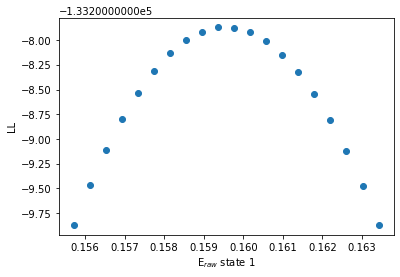

In [38]:
bhm.ll_E_scatter(bdata.models[2],1)

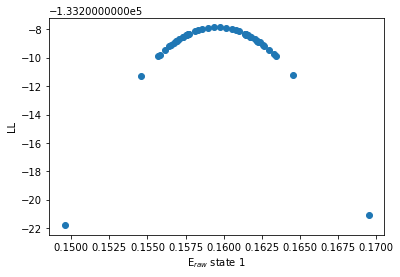

In [39]:
bhm.ll_E_scatter(bdata.models[2],1, rng_only=False)

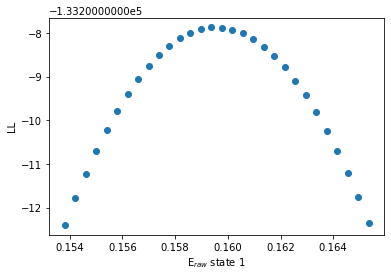

In [40]:
bhm.ll_E_scatter(bdata.models[2],1, rng=3, steps=30)

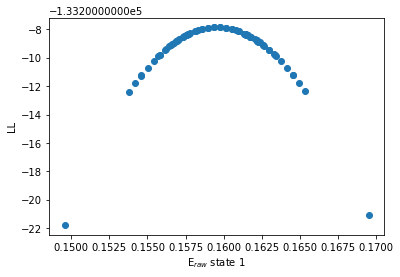

In [41]:
bhm.ll_E_scatter(bdata.models[2],1, rng=3, steps=30, rng_only=False)

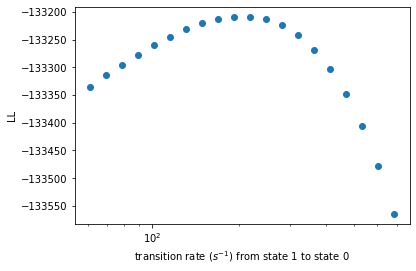

In [42]:
bhm.ll_trans_scatter(bdata.models[2], 1,0)

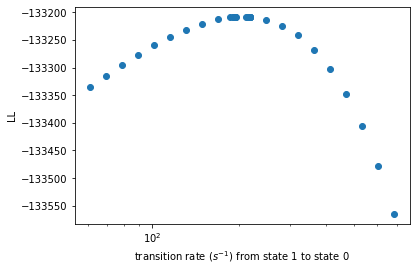

In [43]:
bhm.ll_trans_scatter(bdata.models[2], 1,0, rng=1.5, rng_only=False)

In [44]:
# clear previously stored values so re-evaluation can be tested
bdata.models[2].loglik_err.clear_all()

bdata.models[2].loglik_err.E_eval(locs=(0,1))
bdata.models[2].loglik_err.E

masked_array(data=[0.005624999999999991, 0.0019238281250000128, --],
             mask=[False, False,  True],
       fill_value=nan)

In [45]:
bdata.models[2].loglik_err.S_eval(locs=(0,1))
bdata.models[2].loglik_err.S

masked_array(data=[0.003408203125000009, 0.001953125, --],
             mask=[False, False,  True],
       fill_value=-inf)

In [46]:
bdata.models[2].loglik_err.trans_eval(locs=((0,1), (1,0),))
bdata.models[2].loglik_err.trans[:,:,0]

masked_array(
  data=[[--, 501.8588059030635, --],
        [193.29419084215726, --, --],
        [--, --, --]],
  mask=[[ True, False,  True],
        [False,  True,  True],
        [ True,  True,  True]],
  fill_value=inf)

In [47]:
bdata.models[2].loglik_err.covar_E(0)
bdata.models[2].loglik_err.E_covar[0].E[:,1]

The model converged after 82 iterations

The model converged after 78 iterations

The model converged after 74 iterations

The model converged after 66 iterations

The model converged after 53 iterations

The model converged after 54 iterations

The model converged after 68 iterations

The model converged after 76 iterations

The model converged after 80 iterations

The model converged after 84 iterations

array([0.15892296, 0.15906223, 0.15920173, 0.15934149, 0.15948151,
       0.15962176, 0.15976239, 0.15990334, 0.16004464, 0.16018629])

In [48]:
bdata.models[2].loglik_err.covar_S(1)
bdata.models[2].loglik_err.S_covar[1].S[:,0]

The model converged after 52 iterations

The model converged after 50 iterations

The model converged after 47 iterations

The model converged after 43 iterations

The model converged after 34 iterations

The model converged after 34 iterations

The model converged after 44 iterations

The model converged after 50 iterations

The model converged after 57 iterations

The model converged after 59 iterations

array([0.43215553, 0.43183874, 0.43152246, 0.43120671, 0.43089146,
       0.4305768 , 0.43026259, 0.4299489 , 0.42963572, 0.42932306])

In [49]:
bdata.models[2].loglik_err.covar_trans(0,1)
bdata.models[2].loglik_err.trans_covar[0,1].trans[:,0,1]

The model converged after 76 iterations

The model converged after 77 iterations

The model converged after 80 iterations

The model converged after 83 iterations

The model converged after 80 iterations

The model converged after 92 iterations

The model converged after 136 iterations

The model converged after 211 iterations

Optimization reached maximum number of iterations

Optimization reached maximum number of iterations

array([ 158.70168905,  207.5797375 ,  271.51158681,  355.13361109,
        464.51012722,  607.57318246,  794.6977911 , 1039.45433638,
       1359.59270244, 1778.329506  ])

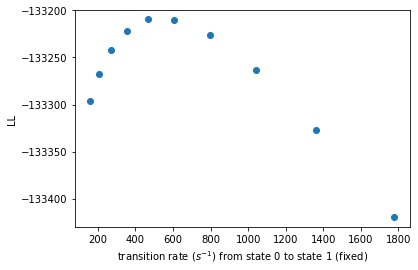

In [50]:
bhm.covar_trans_ll_scatter(bdata.models[2].loglik_err, 0,1)

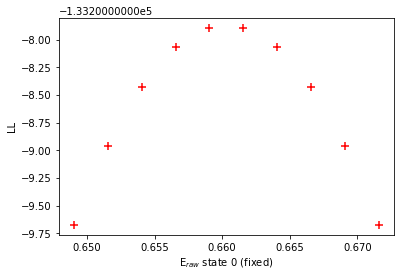

In [51]:
fig, ax = plt.subplots()
bhm.covar_E_ll_scatter(bdata.models[2], 0, ax=ax, s=60, marker='+', c='r')

Text(0, 0.5, '0->1 $s^{-1}$, (optimized)')

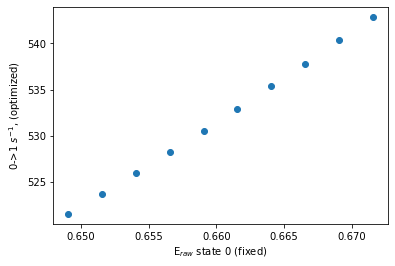

In [52]:
# get the ModelSet of state 0 E_covar
covar_E_state0 = bdata.models[2].loglik_err.E_covar[0]

# get fixed E values for x and optimized 
# note: we use ':' for the 0th dimension, so we look at each model
# then specify the state/transition of interest
x = covar_E_state0.E[:,0]
y = covar_E_state0.trans[:,0,1]

# plot
plt.scatter(x,y)

plt.xlabel("E$_{raw}$ state 0 (fixed)")
plt.ylabel(r"0->1 $s^{-1}$, (optimized)")

Text(0, 0.5, '0->1 $s^{-1}$, (optimized)')

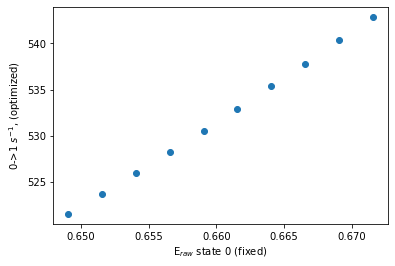

In [53]:
plt.scatter(bdata.models[2].loglik_err.E_covar[0].E[:,0], bdata.models[2].loglik_err.E_covar[0].trans[:,0,1])
plt.xlabel("E$_{raw}$ state 0 (fixed)")
plt.ylabel(r"0->1 $s^{-1}$, (optimized)")

Text(0, 0.5, 'E$_{raw}$ state 2 (optimized)')

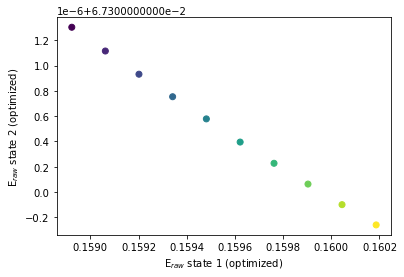

In [54]:
x = bdata.models[2].loglik_err.E_covar[0].E[:,1] # state 1 E values
y = bdata.models[2].loglik_err.E_covar[0].E[:,2] # state 2 E values
c = bdata.models[2].loglik_err.E_covar[0].E[:,0] # state 0 E values (fixed)
c /= c.max() # normalize values since using cmap
plt.scatter(x, y, c=c, cmap='viridis')
plt.xlabel("E$_{raw}$ state 1 (optimized)")
plt.ylabel("E$_{raw}$ state 2 (optimized)")

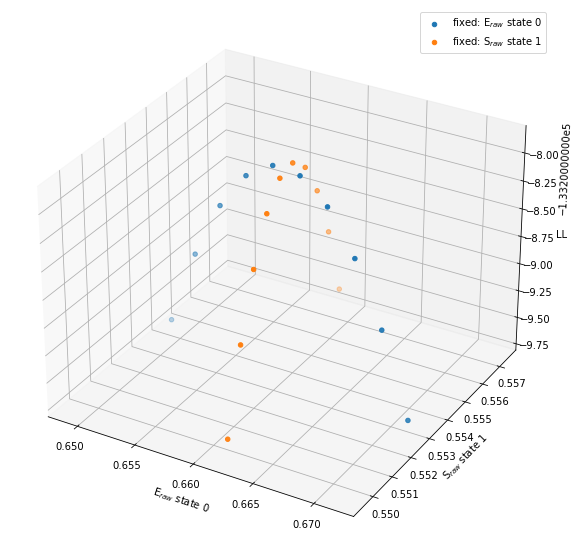

In [55]:
xE = bdata.models[2].loglik_err.E_covar[0].E[:,0] # state 0 E values
yE = bdata.models[2].loglik_err.E_covar[0].S[:,1] # state 1 E values
zE = bdata.models[2].loglik_err.E_covar[0].loglik # loglikelihood, note that there is no state specification

xS = bdata.models[2].loglik_err.S_covar[1].E[:,0] # state 0 E values
yS = bdata.models[2].loglik_err.S_covar[1].S[:,1] # state 1 E values
zS = bdata.models[2].loglik_err.S_covar[1].loglik # loglikelihood, note that there is no state specification

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

ax.scatter(xE, yE, zE, label='fixed: E$_{raw}$ state 0')
ax.scatter(xS, yS, zS, label='fixed: S$_{raw}$ state 1')

ax.set_xlabel("E$_{raw}$ state 0")
ax.set_ylabel("S$_{raw}$ state 1")
ax.set_zlabel("LL")
ax.legend()